## Name Entity Recognition of Financial News Article

In [1]:
# /Users/charles/Downloads/archive (2)
# https://www.kaggle.com/datasets/miguelaenlle/massive-stock-news-analysis-db-for-nlpbacktests
import pandas as pd

# Specify the path to your CSV file
csv_file_path = '/Users/charles/Downloads/archive (2)/analyst_ratings_processed.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
df.head()

,Unnamed: 0,title,date,stock
0,0.0,Stocks That Hit 52-Week Highs On Friday,2020-06-05 10:30:00-04:00,A
1,1.0,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03 10:45:00-04:00,A
2,2.0,71 Biggest Movers From Friday,2020-05-26 04:30:00-04:00,A
3,3.0,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22 12:45:00-04:00,A
4,4.0,B of A Securities Maintains Neutral on Agilent...,2020-05-22 11:38:00-04:00,A


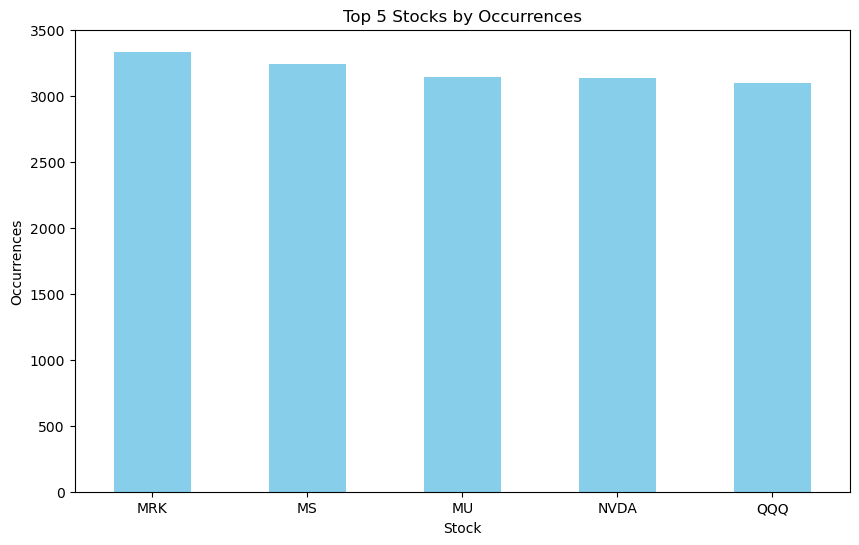

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe
# Count occurrences of each stock
stock_counts = df['stock'].value_counts().nlargest(5)

# Generate a bar plot for the top 5 stocks
plt.figure(figsize=(10, 6))
stock_counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 Stocks by Occurrences')
plt.xlabel('Stock')
plt.ylabel('Occurrences')
plt.xticks(rotation=0)
plt.show()


In [3]:
nvda_df = df[df['stock'] == 'NVDA']

# Display the filtered DataFrame
nvda_df

,Unnamed: 0,title,date,stock
917098,929039.0,Shares of several technology companies are tra...,2020-06-10 12:37:00-04:00,NVDA
917099,929040.0,Afternoon Market Stats in 5 Minutes,2020-06-10 12:12:00-04:00,NVDA
917100,929041.0,Morning Market Stats in 5 Minutes,2020-06-10 10:22:00-04:00,NVDA
917101,929042.0,Shares of several technology companies are tra...,2020-06-09 13:40:00-04:00,NVDA
917102,929043.0,Afternoon Market Stats in 5 Minutes,2020-06-08 12:30:00-04:00,NVDA
...,...,...,...,...
920232,932184.0,J.P. Morgan Upgrades NVIDIA Corporation To Neu...,2011-03-08 07:59:00-05:00,NVDA
920233,932185.0,"JP Morgan Upgrades NVIDIA To Neutral, $21 PT",2011-03-08 07:24:00-05:00,NVDA
920234,932186.0,Goldman Sachs Gives Color On Semiconductors (N...,2011-03-07 08:23:00-05:00,NVDA
920235,932187.0,Auriga Still Not Sure Where Reality Lies For N...,2011-03-07 07:47:00-05:00,NVDA


In [11]:
import pandas as pd

# Ensure 'date' column is in datetime format, replacing invalid entries with NaT
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filter the dataframe for 'NVDA' stock
nvda_df = df[df['stock'] == 'NVDA']

# Drop rows where 'date' is NaT (invalid dates)
nvda_df = nvda_df.dropna(subset=['date'])

# Find the range of dates
min_date = nvda_df['date'].min()
max_date = nvda_df['date'].max()

print(f"The range of dates for NVDA stock is from {min_date} to {max_date}.")


The range of dates for NVDA stock is from 2011-03-03 10:06:00-05:00 to 2020-06-10 12:37:00-04:00.


In [4]:
filtered_df = nvda_df.drop(columns=['date'])
filtered_df

,Unnamed: 0,title,stock
917098,929039.0,Shares of several technology companies are tra...,NVDA
917099,929040.0,Afternoon Market Stats in 5 Minutes,NVDA
917100,929041.0,Morning Market Stats in 5 Minutes,NVDA
917101,929042.0,Shares of several technology companies are tra...,NVDA
917102,929043.0,Afternoon Market Stats in 5 Minutes,NVDA
...,...,...,...
920232,932184.0,J.P. Morgan Upgrades NVIDIA Corporation To Neu...,NVDA
920233,932185.0,"JP Morgan Upgrades NVIDIA To Neutral, $21 PT",NVDA
920234,932186.0,Goldman Sachs Gives Color On Semiconductors (N...,NVDA
920235,932187.0,Auriga Still Not Sure Where Reality Lies For N...,NVDA


Afternoon Market Stats in 5 Minutes


In [10]:
import string

row_number = 4  # Example row number
second_column_value = filtered_df.iloc[row_number, 1]

print(second_column_value)

def clean_string(input_string):
    # Remove punctuation using str.translate and string.punctuation
    no_punct = input_string.translate(str.maketrans('', '', string.punctuation))
    # Convert the resulting string to lowercase
    return no_punct.lower()

cleaned = clean_string(second_column_value)


from nltk.tokenize import sent_tokenize, word_tokenize
x = word_tokenize(cleaned)

In [14]:
print(len(x))

24


In [15]:
# nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

filtered_list = []
for word in x:
   if word.casefold() not in stop_words:
        filtered_list.append(word)

print(len(filtered_list))
words = filtered_list

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in words]
stemmed_words

In [22]:
import spacy
from spacy import displacy

# Load the pre-trained SpaCy model
model = spacy.load('en_core_web_sm')

# model.pipe_names

In [45]:
processed_text = model(second_column_value)

In [46]:
processed_text.text

'Afternoon Market Stats in 5 Minutes'

In [47]:
for word in processed_text.ents:
    print(word.text, word.label_)

5 Minutes TIME


In [28]:
second_column_value

'Shares of several technology companies are trading higher despite market weakness. The sector recently experienced some welling and appears to be rebounding following dip.'

In [12]:
nvda_df = nvda_df.drop(columns=['Unnamed: 0'])
nvda_df

,title,date,stock
917098,Shares of several technology companies are tra...,2020-06-10 12:37:00-04:00,NVDA
917099,Afternoon Market Stats in 5 Minutes,2020-06-10 12:12:00-04:00,NVDA
917100,Morning Market Stats in 5 Minutes,2020-06-10 10:22:00-04:00,NVDA
917101,Shares of several technology companies are tra...,2020-06-09 13:40:00-04:00,NVDA
917102,Afternoon Market Stats in 5 Minutes,2020-06-08 12:30:00-04:00,NVDA
...,...,...,...
920232,J.P. Morgan Upgrades NVIDIA Corporation To Neu...,2011-03-08 07:59:00-05:00,NVDA
920233,"JP Morgan Upgrades NVIDIA To Neutral, $21 PT",2011-03-08 07:24:00-05:00,NVDA
920234,Goldman Sachs Gives Color On Semiconductors (N...,2011-03-07 08:23:00-05:00,NVDA
920235,Auriga Still Not Sure Where Reality Lies For N...,2011-03-07 07:47:00-05:00,NVDA


In [15]:
import pandas as pd

# Convert 'date' column to datetime with utc=True
nvda_df['date'] = pd.to_datetime(nvda_df['date'], utc=True)

# Define date range
start_date = '2014-11-03'
end_date = '2020-06-10'

# Filter DataFrame for rows within this date range
filtered_nvda_df = nvda_df[(nvda_df['date'] >= start_date) & (nvda_df['date'] <= end_date)]

In [16]:
filtered_nvda_df

,title,date,stock
917101,Shares of several technology companies are tra...,2020-06-09 17:40:00+00:00,NVDA
917102,Afternoon Market Stats in 5 Minutes,2020-06-08 16:30:00+00:00,NVDA
917103,Shares of some technology companies are tradin...,2020-06-08 14:53:00+00:00,NVDA
917104,Morning Market Stats in 5 Minutes,2020-06-08 13:47:00+00:00,NVDA
917105,Why BofA Recommends Buying GPU Plays AMD and N...,2020-06-02 17:20:00+00:00,NVDA
...,...,...,...
919580,CNBC's Stock Pops & Drops From November 3: GoP...,2014-11-04 01:17:00+00:00,NVDA
919581,Pacific Crest Upgrades NVIDIA Ahead Of Earnings,2014-11-03 20:42:00+00:00,NVDA
919582,Pacific Crest Upgraded NVIDIA Corporation to S...,2014-11-03 14:43:00+00:00,NVDA
919583,US Stock Futures Drop Ahead Of Economic Data,2014-11-03 12:28:00+00:00,NVDA


In [17]:
import pandas as pd

# Assuming you have already converted 'date' to datetime with utc=True
nvda_df['date'] = nvda_df['date'].dt.date  # Extract only date (ignore time)

# Group by 'date' and concatenate titles
aggregated_df = nvda_df.groupby('date').agg({
    'title': ' '.join,  # Concatenate all titles for each day
    'stock': 'first'    # Keep stock symbol (assuming it's always NVDA)
}).reset_index()

# Display the aggregated DataFrame
aggregated_df

,date,title,stock
0,2011-03-03,Nvidia Goes Negative (NVDA),NVDA
1,2011-03-07,Goldman Sachs Gives Color On Semiconductors (N...,NVDA
2,2011-03-08,"JPM Says ""Our Bearish View on the Company's Ex...",NVDA
3,2011-03-09,"FBR Capital Maintains Market Perform Rating, $...",NVDA
4,2011-03-10,"Benzinga's Top ETF Decliners, March 10th (ERX,...",NVDA
...,...,...,...
1190,2020-05-31,Semiconductor Industry to Lobby for Billions t...,NVDA
1191,2020-06-02,Why BofA Recommends Buying GPU Plays AMD and N...,NVDA
1192,2020-06-08,Afternoon Market Stats in 5 Minutes Shares of ...,NVDA
1193,2020-06-09,Shares of several technology companies are tra...,NVDA


In [18]:
csv_file_path_stock = '/Users/charles/Downloads/HistoricalData_1730673779658.csv'

# Read the CSV file into a DataFrame
stocks_df = pd.read_csv(csv_file_path_stock)

# Display the first few rows of the DataFrame
stocks_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,11/01/2024,$135.40,207127800,$134.70,$137.31,$134.57
1,10/31/2024,$132.76,270039600,$137.60,$137.61,$132.1106
2,10/30/2024,$139.335,179418100,$139.54,$140.33,$136.81
3,10/29/2024,$141.25,157593600,$140.285,$142.2598,$138.90
4,10/28/2024,$140.52,173586700,$143.00,$143.14,$140.05


In [19]:
import pandas as pd

# Assuming your second dataset is already loaded as stocks_df
# Remove '$' and convert relevant columns to numeric
cols_to_clean = ['Close/Last', 'Open', 'High', 'Low']
for col in cols_to_clean:
    stocks_df[col] = stocks_df[col].replace({'\$': ''}, regex=True).astype(float)

# Convert 'Date' column to datetime format
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])

# Display prepared stocks_df
stocks_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2024-11-01,135.400,207127800,134.700,137.3100,134.5700
1,2024-10-31,132.760,270039600,137.600,137.6100,132.1106
2,2024-10-30,139.335,179418100,139.540,140.3300,136.8100
3,2024-10-29,141.250,157593600,140.285,142.2598,138.9000
4,2024-10-28,140.520,173586700,143.000,143.1400,140.0500


In [23]:
import pandas as pd

# Ensure 'date' column in aggregated_df is in datetime format
aggregated_df['date'] = pd.to_datetime(aggregated_df['date'])

# Ensure 'Date' column in stocks_df is in datetime format
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])

# Perform an inner join on 'date' and 'Date'
merged_df = pd.merge(aggregated_df, stocks_df, left_on='date', right_on='Date', how='inner')

# Drop redundant 'Date' column after merging (if needed)
merged_df = merged_df.drop(columns=['Date'])

# Display merged DataFrame
merged_df.head()

,date,title,stock,Close/Last,Volume,Open,High,Low
0,2014-11-03,Pacific Crest Upgrades NVIDIA Ahead Of Earning...,NVDA,0.4968,306247600,0.4997,0.5015,0.4943
1,2014-11-04,Deutsche Bank Expects In-Line Revenues For NVI...,NVDA,0.5032,360097440,0.5000,0.5050,0.4918
2,2014-11-06,NVIDIA Corporation Reports Q3 EPS of $0.39 vs ...,NVDA,0.5055,393299360,0.5043,0.5062,0.4965
3,2014-11-07,UPDATE: Stifel Reiterates On NVIDIA As Strateg...,NVDA,0.4948,450762400,0.5112,0.5171,0.4898
4,2014-11-12,"All Quiet On The Market Front: Dow, S&P 500, N...",NVDA,0.4911,203947280,0.4928,0.4940,0.4845


In [26]:
import pandas as pd

# Assuming 'merged_df' is your existing DataFrame with Date and Close columns

# Convert the 'Date' column to datetime format (if not already done)
merged_df['Date'] = pd.to_datetime(merged_df['date'])

# Sort by date in ascending order (if not already sorted)
merged_df = merged_df.sort_values(by='date')

# Calculate the rolling 3-day average of the closing prices and store it in a new column
merged_df['3_day_Rolling_Avg'] = merged_df['Close/Last'].rolling(window=3).mean()

# Display the updated DataFrame with the new '3_day_Rolling_Avg' column
merged_df

,date,title,stock,Close/Last,Volume,Open,High,Low,Date,3_day_Rolling_Avg
0,2014-11-03,Pacific Crest Upgrades NVIDIA Ahead Of Earning...,NVDA,0.4968,306247600,0.4997,0.5015,0.4943,2014-11-03,NaN
1,2014-11-04,Deutsche Bank Expects In-Line Revenues For NVI...,NVDA,0.5032,360097440,0.5000,0.5050,0.4918,2014-11-04,NaN
2,2014-11-06,NVIDIA Corporation Reports Q3 EPS of $0.39 vs ...,NVDA,0.5055,393299360,0.5043,0.5062,0.4965,2014-11-06,0.501833
3,2014-11-07,UPDATE: Stifel Reiterates On NVIDIA As Strateg...,NVDA,0.4948,450762400,0.5112,0.5171,0.4898,2014-11-07,0.501167
4,2014-11-12,"All Quiet On The Market Front: Dow, S&P 500, N...",NVDA,0.4911,203947280,0.4928,0.4940,0.4845,2014-11-12,0.497133
...,...,...,...,...,...,...,...,...,...,...
830,2020-05-28,Synopsys' Silicon-Proven DesignWare DDR IP for...,NVDA,8.4870,736128000,8.4123,8.7605,8.3793,2020-05-28,8.576667
831,2020-06-02,Why BofA Recommends Buying GPU Plays AMD and N...,NVDA,8.8253,391320560,8.7963,8.8373,8.6580,2020-06-02,8.612500
832,2020-06-08,Afternoon Market Stats in 5 Minutes Shares of ...,NVDA,8.8050,387737240,8.8773,8.8896,8.6858,2020-06-08,8.705767
833,2020-06-09,Shares of several technology companies are tra...,NVDA,9.0460,468488800,8.8000,9.1097,8.7513,2020-06-09,8.892100


In [56]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Load the SpaCy language model
nlp = spacy.load('en_core_web_sm')

# Add the TextBlob sentiment analysis component to the pipeline if not already added
if 'spacytextblob' not in nlp.pipe_names:
    nlp.add_pipe('spacytextblob')

# Function to determine binary sentiment based on polarity
def get_binary_sentiment(text):
    doc = nlp(text)  # Process the text with SpaCy pipeline
    polarity = doc._.blob.polarity  # Get polarity from TextBlob
    return 1 if polarity > 0 else 0  # Return 1 for positive, 0 for non-positive

# Apply the sentiment analysis model to the 'title' column and create a new 'Sentiment' column
merged_df['Sentiment'] = merged_df['title'].apply(get_binary_sentiment)

# Display the updated DataFrame with the new 'Sentiment' column
merged_df[['date', 'title', 'Sentiment']].head()

,date,title,Sentiment
0,2014-11-03,Pacific Crest Upgrades NVIDIA Ahead Of Earning...,1
1,2014-11-04,Deutsche Bank Expects In-Line Revenues For NVI...,1
2,2014-11-06,NVIDIA Corporation Reports Q3 EPS of $0.39 vs ...,1
3,2014-11-07,UPDATE: Stifel Reiterates On NVIDIA As Strateg...,0
4,2014-11-12,"All Quiet On The Market Front: Dow, S&P 500, N...",0


In [58]:
# 1 positive / 0 non-positive (neutral or negative)
merged_df

,date,title,stock,Close/Last,Volume,Open,High,Low,Date,3_day_Rolling_Avg,Sentiment
0,2014-11-03,Pacific Crest Upgrades NVIDIA Ahead Of Earning...,NVDA,0.4968,306247600,0.4997,0.5015,0.4943,2014-11-03,NaN,1
1,2014-11-04,Deutsche Bank Expects In-Line Revenues For NVI...,NVDA,0.5032,360097440,0.5000,0.5050,0.4918,2014-11-04,NaN,1
2,2014-11-06,NVIDIA Corporation Reports Q3 EPS of $0.39 vs ...,NVDA,0.5055,393299360,0.5043,0.5062,0.4965,2014-11-06,0.501833,1
3,2014-11-07,UPDATE: Stifel Reiterates On NVIDIA As Strateg...,NVDA,0.4948,450762400,0.5112,0.5171,0.4898,2014-11-07,0.501167,0
4,2014-11-12,"All Quiet On The Market Front: Dow, S&P 500, N...",NVDA,0.4911,203947280,0.4928,0.4940,0.4845,2014-11-12,0.497133,0
...,...,...,...,...,...,...,...,...,...,...,...
830,2020-05-28,Synopsys' Silicon-Proven DesignWare DDR IP for...,NVDA,8.4870,736128000,8.4123,8.7605,8.3793,2020-05-28,8.576667,0
831,2020-06-02,Why BofA Recommends Buying GPU Plays AMD and N...,NVDA,8.8253,391320560,8.7963,8.8373,8.6580,2020-06-02,8.612500,1
832,2020-06-08,Afternoon Market Stats in 5 Minutes Shares of ...,NVDA,8.8050,387737240,8.8773,8.8896,8.6858,2020-06-08,8.705767,0
833,2020-06-09,Shares of several technology companies are tra...,NVDA,9.0460,468488800,8.8000,9.1097,8.7513,2020-06-09,8.892100,1
